In [1]:
import pandas as pd 
import numpy as np
loan_df=pd.read_csv("train_ctrUa4K.csv")
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
from sklearn import cluster
dir(cluster)

['AffinityPropagation',
 'AgglomerativeClustering',
 'Birch',
 'BisectingKMeans',
 'DBSCAN',
 'FeatureAgglomeration',
 'HDBSCAN',
 'KMeans',
 'MeanShift',
 'MiniBatchKMeans',
 'OPTICS',
 'SpectralBiclustering',
 'SpectralClustering',
 'SpectralCoclustering',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_affinity_propagation',
 '_agglomerative',
 '_bicluster',
 '_birch',
 '_bisect_k_means',
 '_dbscan',
 '_dbscan_inner',
 '_feature_agglomeration',
 '_hdbscan',
 '_hierarchical_fast',
 '_k_means_common',
 '_k_means_elkan',
 '_k_means_lloyd',
 '_k_means_minibatch',
 '_kmeans',
 '_mean_shift',
 '_optics',
 '_spectral',
 'affinity_propagation',
 'cluster_optics_dbscan',
 'cluster_optics_xi',
 'compute_optics_graph',
 'dbscan',
 'estimate_bandwidth',
 'get_bin_seeds',
 'k_means',
 'kmeans_plusplus',
 'linkage_tree',
 'mean_shift',
 'spectral_clustering',
 'ward_tree']

In [3]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
loan_df["LoanAmount"]=loan_df["LoanAmount"].fillna(loan_df["LoanAmount"].mode()[0])
X=loan_df.iloc[:,[6,8]].values
from sklearn.cluster import KMeans
k_means_= KMeans(n_clusters=4,max_iter=300,random_state=123)
k_means_.fit(X)

KMeans(n_clusters=4, random_state=123)

In [5]:
k_mean=KMeans(n_clusters=5,max_iter=300,random_state=1234)
k_mean.fit_predict(X)

array([3, 0, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0,
       3, 0, 0, 3, 0, 2, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 0, 3, 3, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 0, 2, 0, 2, 0, 3, 0, 3, 0, 3, 0,
       0, 4, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 3, 0, 0,
       0, 3, 0, 0, 3, 0, 0, 4, 0, 4, 0, 0, 0, 3, 0, 2, 3, 0, 0, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0,
       0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0,

In [6]:
#print inertia value 
k_mean.inertia_

1562164393.3315227

In [7]:
k_mean.cluster_centers_      #center

array([[ 3248.05324074,   117.93981481],
       [65366.66666667,   516.66666667],
       [16222.3030303 ,   283.6969697 ],
       [ 7270.54929577,   185.36619718],
       [37677.75      ,   283.        ]])

In [8]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans_=KMeans(n_clusters=i,max_iter=300,random_state=1234)
    kmeans_.fit(X)
    wcss.append(round(kmeans_.inertia_,2))
wcss                                            #provide different k value and we find best method.

[22881743157.26,
 9085080595.5,
 4919126583.09,
 3052510064.25,
 1562164393.33,
 1077912672.98,
 711274189.64,
 534113432.41,
 467112644.41]

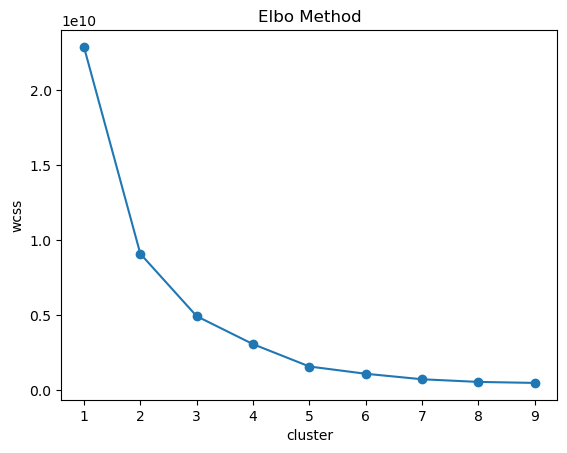

In [9]:
import matplotlib.pyplot as plt 
plt.scatter(range(1,10),wcss)
plt.plot(range(1,10),wcss)
plt.title("Elbo Method")
plt.xlabel("cluster")
plt.ylabel("wcss")
plt.show()

In [10]:
k_means1=KMeans(n_clusters=4,max_iter=300,random_state=1242)
y_predict=k_means1.fit_predict(X)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
loan_df["cluster_group"]=y_predict
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,cluster_group
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0


In [12]:
loan_df["cluster_group"].value_counts()

cluster_group
0    539
2     68
3      4
1      3
Name: count, dtype: int64

In [13]:
cs_1=loan_df[loan_df["cluster_group"]==0].iloc[:,[6,8]]
cs_2=loan_df[loan_df["cluster_group"]==1].iloc[:,[6,8]]
cs_3=loan_df[loan_df["cluster_group"]==2].iloc[:,[6,8]]
cs_4=loan_df[loan_df["cluster_group"]==3].iloc[:,[6,8]]
cs_5=loan_df[loan_df["cluster_group"]==4].iloc[:,[6,8]]
d1={"cluster1":cs_1.mean(),
   "cluster2":cs_2.mean(),
   "cluster3":cs_3.mean(),
   "cluster4":cs_4.mean(),
   "cluster5":cs_5.mean()}

pd.DataFrame(d1)

,cluster1,cluster2,cluster3,cluster4,cluster5
ApplicantIncome,3880.606679,65366.666667,12930.382353,37677.75,NaN
LoanAmount,129.651206,516.666667,246.352941,283.00,NaN


In [14]:
a=X[y_predict==1,3]
b=X[y_predict==3,3]
print(a)
print(b)
#???????????????????????????????**Why**??????????????????????????/

IndexError: index 3 is out of bounds for axis 1 with size 2

In [27]:
X[:,0]
X[y_predict==0,0]

array([5849., 4583., 3000., 2583., 6000., 5417., 2333., 3036., 4006.,
       3200., 2500., 3073., 1853., 1299., 4950., 3596., 3510., 4887.,
       2600., 7660., 5955., 2600., 3365., 3717., 2799., 4226., 1442.,
       3750., 4166., 3167., 4692., 3500., 2275., 1828., 3667., 4166.,
       3748., 3600., 1800., 2400., 3941., 4695., 3410., 5649., 5821.,
       2645., 4000., 1928., 3086., 4230., 4616., 2708., 2132., 3366.,
       8080., 3357., 2500., 3029., 2609., 4945., 4166., 5726., 3200.,
       7100., 4300., 3208., 1875., 3500., 4755., 5266., 3750., 3750.,
       1000., 3167., 3333., 3846., 2395., 1378., 6000., 3988., 2366.,
       3333., 2500., 5695., 2958., 6250., 3273., 4133., 3620., 6782.,
       2484., 1977., 4188., 1759., 4288., 4843., 4652., 3816., 3052.,
       7333., 3800., 2071., 5316., 2929., 3572., 7451., 5050., 3167.,
       2214., 5568., 5667., 4166., 2137., 2957., 4300., 3692., 3865.,
       6080., 2014., 2718., 3459., 4895., 4000., 4583., 3316., 4200.,
       5042., 5417.,

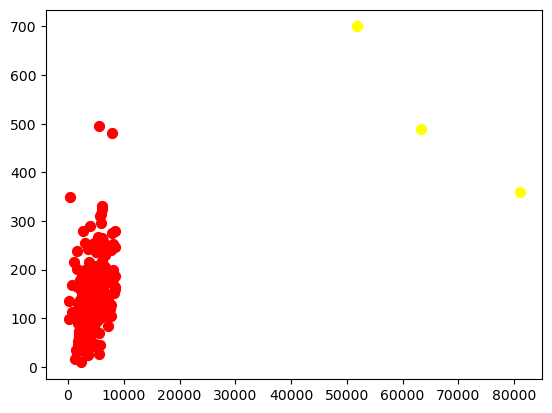

In [15]:
plt.scatter(X[y_predict==0,0],X[y_predict==0,1],c="red",s=50,label="cluster1")
plt.scatter(X[y_predict==1,0],X[y_predict==1,1],c="yellow",s=50,label="cluster2")
#plt.scatter(X[y_predict==1,1],X[y_predict==1,2],c="blue",s=50,label="cluster3")
#plt.scatter(X[y_predict==1,1],X[y_predict==1,2],c="red",s=50,label="cluster4")
#plt.scatter(X[y_predict==2,1],X[y_predict==2,2],c="red",s=50,label="cluster5")
plt.show()

In [ ]:
loan_df